In [63]:
import sklearn.preprocessing
from wrangle import wrangle_zillow
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

import pandas as pd

In [2]:
train, validate, test = wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [3]:
train.columns


Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [4]:
train.shape

(1068354, 7)

In [5]:
train.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [16]:
train_tax_amount = train[['taxamount']]

In [7]:
val_tax_amount = validate[['taxamount']]

In [8]:
test_tax_amount = test[['taxamount']]

In [6]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [98]:
scaler.fit(train_tax_amount)

MinMaxScaler()

In [99]:
x_train_scaled = scaler.transform(train_tax_amount)

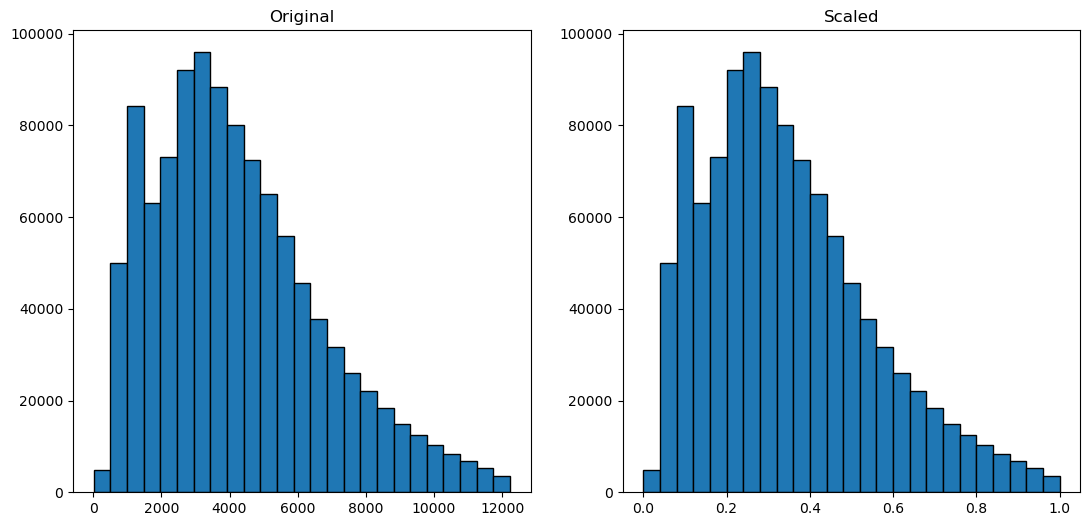

In [100]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_tax_amount, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [12]:
pd.DataFrame(x_train_scaled, index=train.index, columns=train.columns)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
898710,1.000000,0.666667,0.921552,0.198272,0.758140,0.229151,0.000000
951392,0.666667,0.666667,0.546105,0.246338,0.818605,0.305050,0.000000
1847439,0.333333,0.000000,0.444536,0.027437,0.553488,0.066557,0.000000
706503,0.666667,0.500000,0.557941,0.083124,0.795349,0.106780,1.000000
461225,0.000000,0.333333,0.312964,0.043986,0.730233,0.046388,0.000000
...,...,...,...,...,...,...,...
1025016,0.000000,0.000000,0.394440,0.059745,0.604651,0.098293,0.000000
1734384,0.333333,0.333333,0.367465,0.512764,0.772093,0.495925,0.297297
1121629,0.666667,0.666667,0.478393,0.486747,0.725581,0.484588,0.000000
533946,0.333333,0.333333,0.469584,0.149250,0.939535,0.223103,0.000000


In [ ]:
scaler.inverse_transform(x_train_scaled)

In [ ]:
pd.DataFrame(scaler.inverse_transform(x_train_scaled), index=train.index, columns=train.columns)

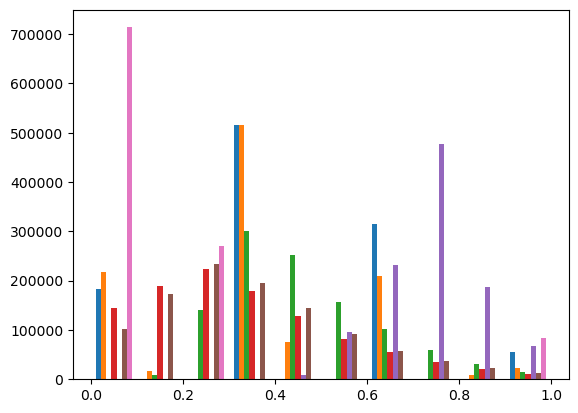

In [13]:
plt.hist(pd.DataFrame(x_train_scaled, index=train.index, columns=train.columns));

# Standard Scaler

In [25]:
st_scaler = sklearn.preprocessing.StandardScaler()

In [35]:
train_tax_amount2 = train[['taxamount']]

In [36]:
st_scaler.fit(train_tax_amount2)

StandardScaler()

In [37]:
x_train_scaled = st_scaler.transform(train_tax_amount2)

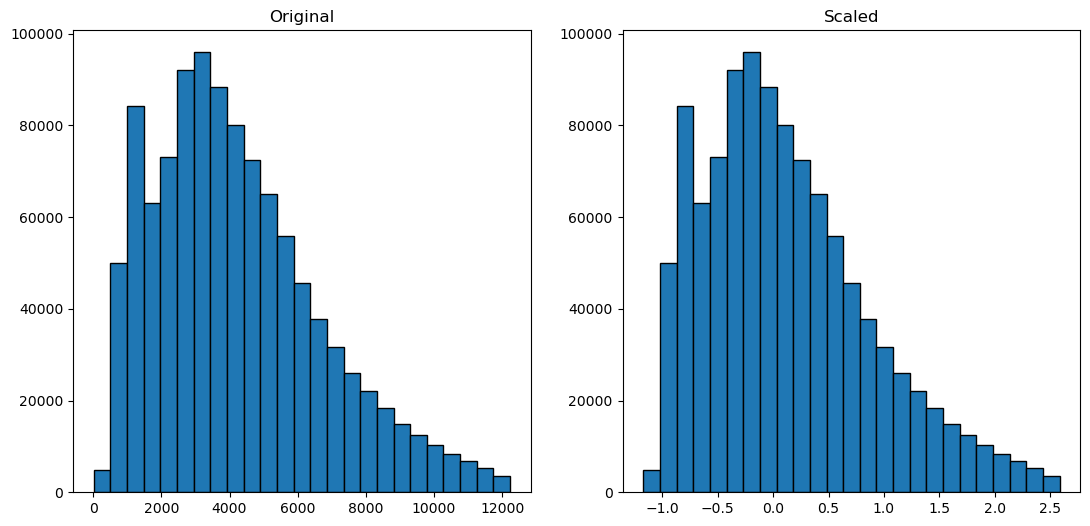

In [60]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_tax_amount2, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

# Robust Scaler

In [40]:
ro_scaler = sklearn.preprocessing.RobustScaler()

In [41]:
train_tax_amount3 = train[['taxamount']]

In [51]:
ro_scaler.fit(train_tax_amount3)

RobustScaler()

In [52]:
x_train_scaled = ro_scaler.transform(train_tax_amount3)

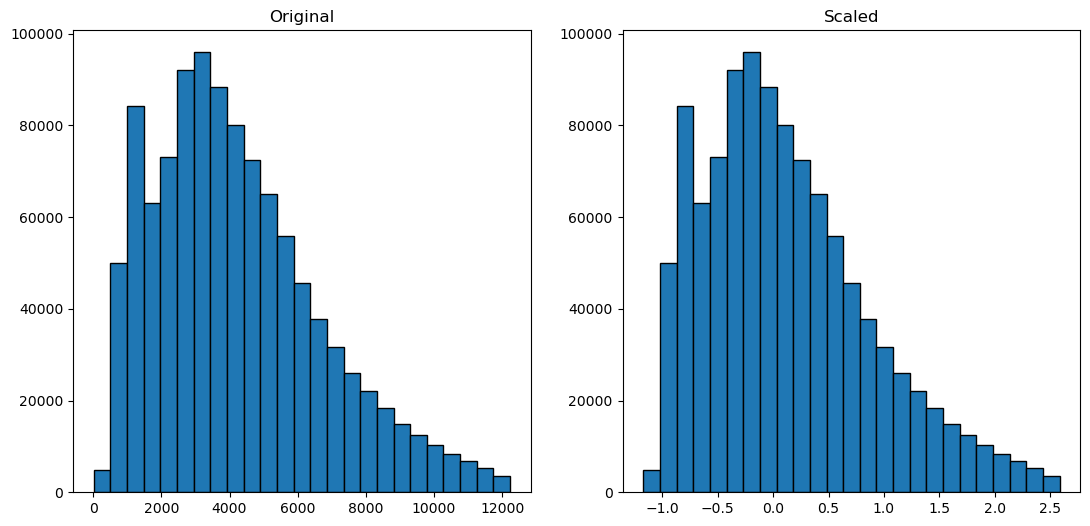

In [59]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_tax_amount3, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

In [54]:
inverse_x_train_scaled = ro_scaler.inverse_transform(x_train_scaled)


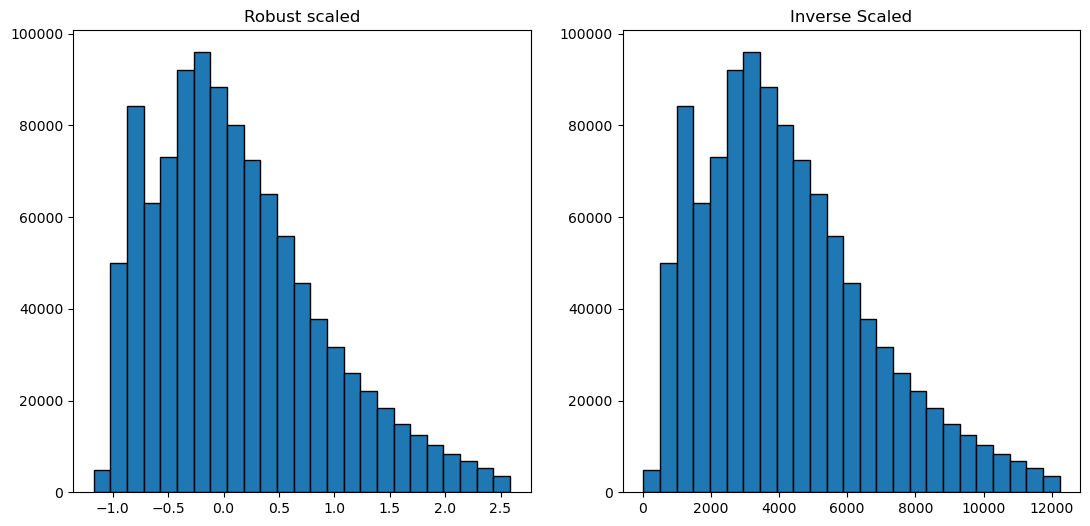

In [58]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Robust scaled')
plt.subplot(122)
plt.hist(inverse_x_train_scaled, bins=25, ec='black')
plt.title('Inverse Scaled')
plt.show()

# Quantile Transformer

In [83]:
qt = QuantileTransformer(output_distribution='normal')

In [84]:
train_tax_amount4 = train[['taxamount']]

In [85]:
qt.fit(train_tax_amount4)

QuantileTransformer(output_distribution='normal')

In [86]:
x_train_scaled = qt.transform(train_tax_amount4)

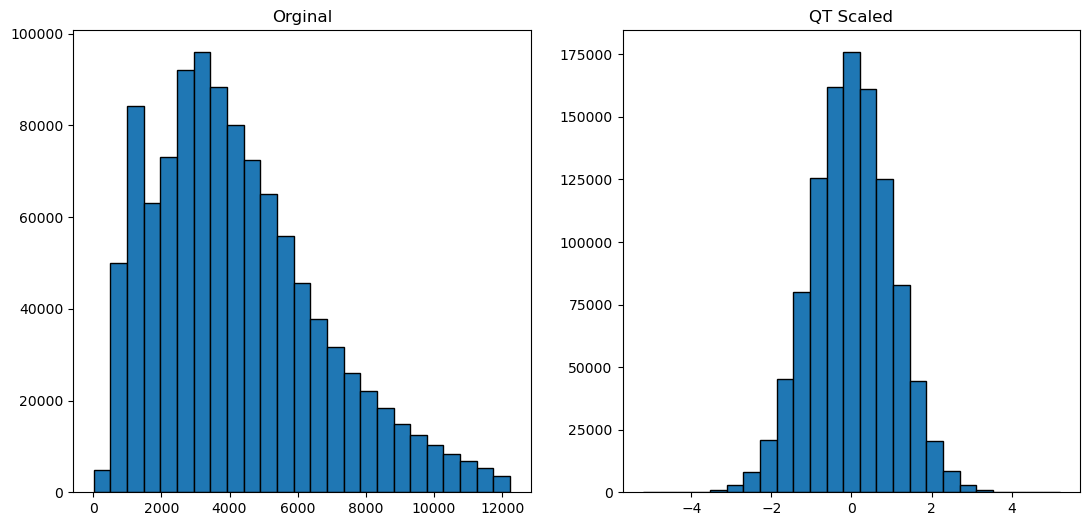

In [87]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_tax_amount4, bins=25, ec='black')
plt.title('Orginal')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('QT Scaled')
plt.show()

In [94]:
qt = QuantileTransformer()

In [92]:
train_tax_amount4 = train[['taxamount']]

In [95]:
qt.fit(train_tax_amount4)

QuantileTransformer()

In [96]:
x_train_scaled = qt.transform(train_tax_amount4)

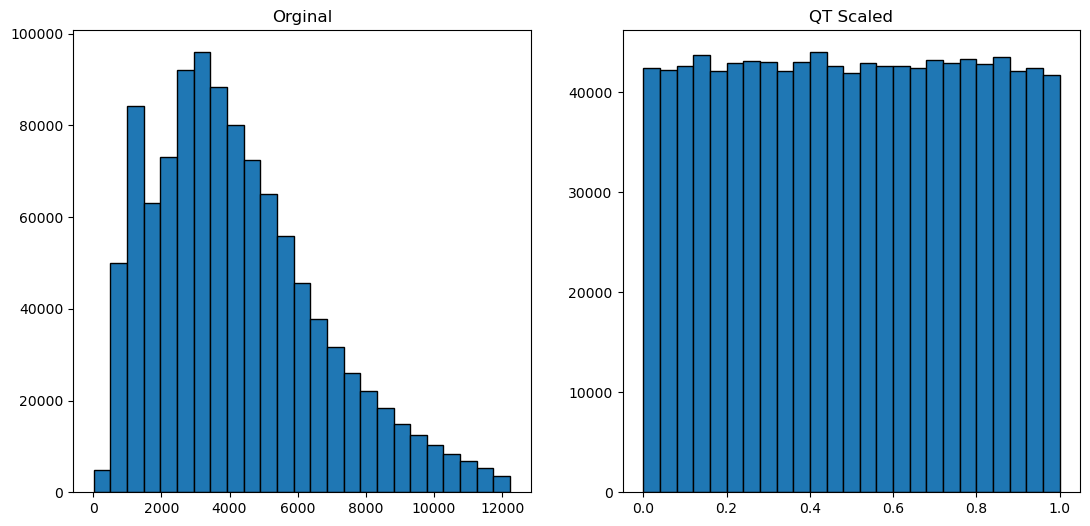

In [97]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_tax_amount4, bins=25, ec='black')
plt.title('Orginal')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('QT Scaled')
plt.show()

In [103]:
x_cols = [col for col in train.columns if col not in ['tax_value', 'fips', 'year_built']]
x_cols

['bedrooms', 'bathrooms', 'area', 'taxamount']

In [135]:
def scale_data(train, val, test):
    x_cols = [col for col in train.columns if col not in ['tax_value', 'fips', 'year_built']]
    split = [train, validate, test]
    scale_list= []
    scaler = sklearn.preprocessing.MinMaxScaler()
    for cut in split:
        scaler.fit(cut[x_cols])
        x_cut_scaled = scaler.transform(cut[x_cols])
        cut_scale_df = pd.DataFrame(x_cut_scaled, columns=x_cols)
        scale_list.append(cut_scale_df)

    
    return scale_list[0], scale_list[1], scale_list[2] 


In [136]:
scale_train , scale_val, scale_test = scale_data(train, validate, test)

In [130]:
scale_train

,bedrooms,bathrooms,area,taxamount
0,1.000000,0.666667,0.921552,0.229151
1,0.666667,0.666667,0.546105,0.305050
2,0.333333,0.000000,0.444536,0.066557
3,0.666667,0.500000,0.557941,0.106780
4,0.000000,0.333333,0.312964,0.046388
...,...,...,...,...
1068349,0.000000,0.000000,0.394440,0.098293
1068350,0.333333,0.333333,0.367465,0.495925
1068351,0.666667,0.666667,0.478393,0.484588
1068352,0.333333,0.333333,0.469584,0.223103


In [131]:
scale_val

,bedrooms,bathrooms,area,taxamount
0,0.000000,0.333333,0.377307,0.233303
1,0.333333,0.666667,0.418342,0.462009
2,0.666667,0.666667,0.642798,0.634070
3,0.666667,0.333333,0.398237,0.342155
4,1.000000,0.666667,0.577527,0.269893
...,...,...,...,...
457862,0.333333,0.333333,0.438722,0.290203
457863,0.666667,0.333333,0.303498,0.251743
457864,0.333333,0.333333,0.390801,0.316882
457865,0.333333,0.333333,0.345084,0.425538


In [132]:
scale_test

,bedrooms,bathrooms,area,taxamount
0,0.666667,0.666667,0.515540,0.528377
1,0.333333,0.333333,0.428001,0.422013
2,0.666667,0.333333,0.629598,0.277632
3,0.000000,0.333333,0.285144,0.289741
4,0.666667,0.333333,0.364129,0.182428
...,...,...,...,...
381551,0.333333,0.666667,0.580838,0.697683
381552,0.666667,0.333333,0.380667,0.384425
381553,0.333333,0.333333,0.536356,0.478199
381554,0.333333,0.666667,0.546336,0.378427
